In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
#Import requests library
import requests
#Import the API key
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
#Import the datetime module from the datetime library
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count=1
set_count=1

#Loop through all the cities in our list
#for i in range(len(cities)):
    #Group cities in sets of 50 for logging purposes
 #   if (i % 50==0 and i>=50):
  #      set_count+=1
   #     record_count=1
    #Create endpoint URL with each city
    #city_url=url+"&q="+cities[i]

#Instead of two for loops use the enumerate function
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | oranjestad
Processing Record 3 of Set 1 | irbeyskoye
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | soe
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | lolua
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | buchanan
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | benguela
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | san pedro
Processing Record 22 of Set 1 

Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | zaysan
Processing Record 38 of Set 4 | kyrylivka
Processing Record 39 of Set 4 | farsund
Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | andrychow
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | dornbirn
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | placerville
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | qandala
Processing Record 5 of Set 5 | guarapari
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | likasi
Processing Record 8 of Set 5 | mayor pablo lagerenza
Processing Record 9 of Set 5 | mayumba
Pr

Processing Record 26 of Set 8 | marrakesh
Processing Record 27 of Set 8 | yokaichi
Processing Record 28 of Set 8 | ituni
City not found. Skipping...
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | joaima
Processing Record 32 of Set 8 | ostashkov
Processing Record 33 of Set 8 | panjab
Processing Record 34 of Set 8 | san antonio
Processing Record 35 of Set 8 | beringovskiy
Processing Record 36 of Set 8 | enterprise
Processing Record 37 of Set 8 | comodoro rivadavia
Processing Record 38 of Set 8 | herat
Processing Record 39 of Set 8 | taoudenni
Processing Record 40 of Set 8 | mopipi
Processing Record 41 of Set 8 | grindavik
Processing Record 42 of Set 8 | college
Processing Record 43 of Set 8 | jacqueville
Processing Record 44 of Set 8 | bauchi
Processing Record 45 of Set 8 | zaoyang
Processing Record 46 of Set 8 | durban
Processing Record 47 of Set 8 | olden
Processing Record 48 of Set 8 | 

Processing Record 13 of Set 12 | matamoros
Processing Record 14 of Set 12 | magistralnyy
Processing Record 15 of Set 12 | assai
Processing Record 16 of Set 12 | richards bay
Processing Record 17 of Set 12 | teguldet
Processing Record 18 of Set 12 | bollnas
Processing Record 19 of Set 12 | aligarh
Processing Record 20 of Set 12 | benjamin aceval
Processing Record 21 of Set 12 | lynn haven
Processing Record 22 of Set 12 | iskateley
Processing Record 23 of Set 12 | price
Processing Record 24 of Set 12 | serov
Processing Record 25 of Set 12 | valparaiso
Processing Record 26 of Set 12 | kazachinskoye
Processing Record 27 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 28 of Set 12 | fria
Processing Record 29 of Set 12 | mahina
Processing Record 30 of Set 12 | rusera
Processing Record 31 of Set 12 | morondava
Processing Record 32 of Set 12 | tadine
Processing Record 33 of Set 12 | kiunga
Processing Record 34 of Set 12 | ulaanbaatar
Processing Record 35 of Set 12 | iacu
Proc

In [11]:
#Convert the array of dictionaries to a pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,75.22,71,6,11.52,MU,2021-10-20 15:05:52
1,Oranjestad,12.5240,-70.0270,89.55,62,40,18.41,AW,2021-10-20 15:04:34
2,Irbeyskoye,55.6428,95.4522,35.64,76,5,2.95,RU,2021-10-20 15:05:52
3,Hermanus,-34.4187,19.2345,72.81,57,81,16.80,ZA,2021-10-20 15:05:53
4,Atuona,-9.8000,-139.0333,76.28,83,27,13.00,PF,2021-10-20 15:05:53
5,Soe,-9.8607,124.2840,68.97,79,84,1.97,ID,2021-10-20 15:05:54
6,Ushuaia,-54.8000,-68.3000,47.86,57,75,17.27,AR,2021-10-20 15:05:54
7,Bilma,18.6853,12.9164,99.75,8,0,14.12,NE,2021-10-20 15:05:54
8,Port Elizabeth,-33.9180,25.5701,68.29,77,0,17.27,ZA,2021-10-20 15:05:55
9,Chuy,-33.6971,-53.4616,66.88,52,10,8.37,UY,2021-10-20 15:05:55


In [15]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2021-10-20 15:05:52,-20.3428,57.7575,75.22,71,6,11.52
1,Oranjestad,AW,2021-10-20 15:04:34,12.5240,-70.0270,89.55,62,40,18.41
2,Irbeyskoye,RU,2021-10-20 15:05:52,55.6428,95.4522,35.64,76,5,2.95
3,Hermanus,ZA,2021-10-20 15:05:53,-34.4187,19.2345,72.81,57,81,16.80
4,Atuona,PF,2021-10-20 15:05:53,-9.8000,-139.0333,76.28,83,27,13.00


In [16]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#Extract relevant fields from the dataframe for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

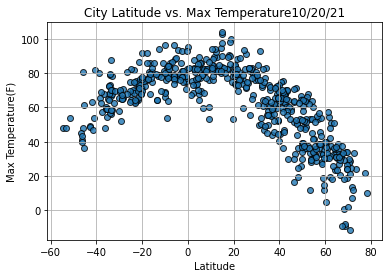

In [20]:
#Import time module
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

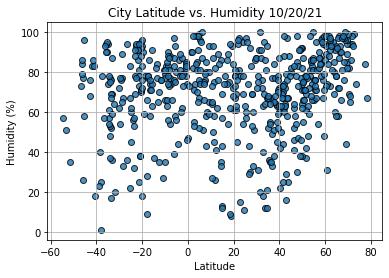

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

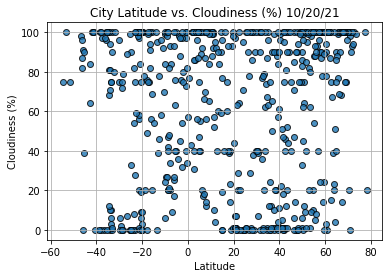

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

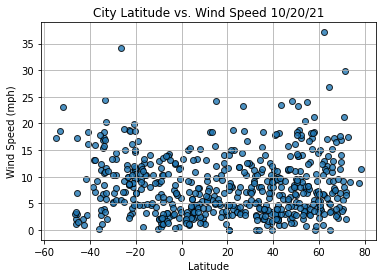

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()